# Apendizado de máquina supervisionado para classificação

> O machine learning (ML) é a tarefa de receber uma entrada $\mathbf{X}$ e a saída correta $\mathbf{y}$ (supervisão) e tem que construir uma função $f$ que mapeia $\mathbf{X} \rightarrow \mathbf{y}$. No futuro podemos usar $f$ para estimar a resposta de novas entradas $\mathbf{\hat{y}}$ 

In [2]:
!pip install --quiet pandas matplotlib seaborn scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Blood_samples_dataset_balanced_MODIFICADO.csv")
df. sample(5)

,Unnamed: 0,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
1089,1089,0.278161,0.471518,0.589715,0.961318,0.652815,1.258953,0.042865,0.949393,0.502800,...,0.623395,0.538853,1.134113,0.649887,0.551429,1.044546,0.811341,0.300025,0.668475,Anemia
2111,2111,0.238341,0.624760,0.686667,1.012606,0.734566,0.923029,0.095872,0.348080,0.743164,...,0.357828,0.485991,0.498814,0.324274,0.821907,0.935374,0.421738,0.342273,0.422237,Anemia
966,966,0.149718,0.775277,0.855435,0.362927,0.609378,0.385761,0.489251,0.089665,0.309486,...,0.883516,0.992824,0.644145,0.646903,0.831927,0.873840,0.431420,0.422924,0.798497,Anemia
1823,1823,0.469797,0.353831,0.426228,0.118181,0.105344,0.669187,0.773384,0.578255,1.003065,...,0.440736,0.569982,0.995824,0.316513,0.368838,0.829065,0.456738,0.744146,0.455963,Anemia
2140,2140,0.581784,0.395645,0.431056,0.120044,0.113688,0.635670,0.602981,0.601033,1.104753,...,0.418670,0.698885,1.267788,0.384856,0.566526,0.904003,0.394173,0.695865,0.343274,Anemia


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 2351 non-null   int64  
 1   Glucose                                    2351 non-null   float64
 2   Cholesterol                                2351 non-null   float64
 3   Hemoglobin                                 2351 non-null   float64
 4   Platelets                                  2351 non-null   float64
 5   White Blood Cells                          2351 non-null   float64
 6   Red Blood Cells                            2351 non-null   float64
 7   Hematocrit                                 2351 non-null   float64
 8   Mean Corpuscular Volume                    2351 non-null   float64
 9   Mean Corpuscular Hemoglobin                2351 non-null   float64
 10  Mean Corpuscular Hemoglo

In [5]:
df = df.drop("Unnamed: 0", axis=1)
df.sample(5)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
1542,0.314627,0.493265,0.844132,0.489840,0.812387,1.058454,0.443275,0.384919,1.119861,0.699248,...,0.169214,0.475282,0.966257,0.812999,0.371861,0.894466,0.854848,0.255191,0.833156,Thalasse
2207,0.379434,0.256651,1.015384,1.100904,0.329384,1.165824,0.049062,0.954222,1.247162,1.159105,...,0.830861,0.848200,0.490910,0.142019,0.601881,0.878633,0.352018,0.336789,0.590821,Anemia
1797,0.289163,0.685069,0.854267,0.713877,0.521145,0.807635,0.294919,0.587978,0.759997,0.427410,...,0.291049,0.330119,1.127962,0.328099,0.581739,0.260056,0.571044,0.187099,0.265787,Healthy
1169,0.241620,0.778120,1.012885,0.847333,0.542201,0.644911,0.948449,0.610642,0.267929,1.100674,...,0.696294,0.334322,0.436645,0.248871,0.783727,0.951812,0.262861,1.092890,0.355964,Thalasse
1506,0.328146,0.298853,1.251748,0.740686,1.004156,0.537367,0.946913,0.690029,0.436976,0.709176,...,0.206834,0.443251,1.048210,0.708236,0.118356,0.691534,0.816281,0.430188,0.507418,Healthy


In [ ]:
for coluna in df.columns:
    print(coluna)
    sns.catplot(data=df, x="Disease", y=coluna, kind="bar", hue="Disease") #kind pode ser boxen, box.....
    plt.show()

In [13]:
df.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [14]:
X = df.drop("Disease", axis = 1)
y = df["Disease"]

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [16]:
deyckson = DecisionTreeClassifier()
deyckson.fit(X, y)

DecisionTreeClassifier()

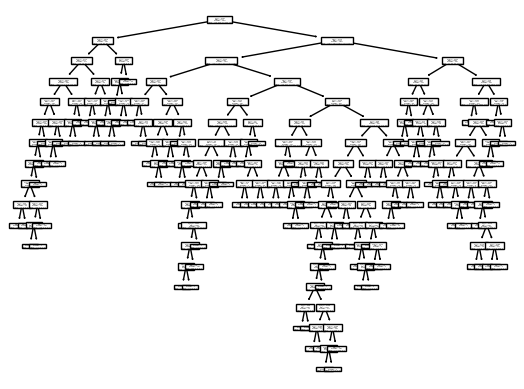

In [20]:

plot_tree(deyckson);

In [21]:
from sklearn.metrics import accuracy_score

In [25]:
pac_aleatorio = X.sample(3, random_state=42)
pac_aleatorio

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
2236,0.166203,0.715004,0.718211,1.038445,0.791181,0.818299,0.262325,1.033515,0.396963,0.057835,...,0.388513,0.747181,0.177936,1.113619,0.617529,0.866632,0.654956,0.366683,0.819282,0.352590
668,0.563720,0.468631,0.390634,0.580349,1.159950,0.299237,0.985401,0.344824,0.278967,0.844606,...,1.049622,0.530250,0.863418,0.548694,0.389320,0.300619,0.473365,0.710559,0.739672,1.029516
2005,0.576591,0.864063,0.571008,1.153372,0.526875,0.653220,0.942053,1.041122,0.210588,1.227110,...,0.357224,1.025883,0.334834,0.465389,0.637683,0.883233,0.322640,0.412150,1.088099,0.557686


In [29]:
y.iloc[2236]


'Diabetes'

In [28]:
deyckson.predict(pac_aleatorio)

array(['Anemia', 'Healthy', 'Diabetes'], dtype=object)

In [30]:
from sklearn.metrics import accuracy_score
y_pred = deyckson.predict(X)
accuracy_score(y, y_pred)

1.0

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [33]:
deycksonv2 = DecisionTreeClassifier()
deycksonv2.fit(X_train, y_train)
deycksonv2

DecisionTreeClassifier()

In [36]:
print(accuracy_score(y_train, deycksonv2.predict(X_train)))
print(accuracy_score(y_test, deycksonv2.predict(X_test)))

1.0
0.904639175257732
